# Analyse Exploratoire des Données Fusionnées

Ce Notebook contient l'analyse exploratoire des données issues de la fusion (`merged_data`).

Nous allons examiner la structure des données, identifier les colonnes importantes, détecter les valeurs manquantes, et visualiser les caractéristiques principales.

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Définir le chemin du fichier merged_data\n",
merged_data_path = '../data/processed/merged_data.csv'

# Charger merged_data,
merged_data = pd.read_csv(merged_data_path)
merged_data.head()

,DATE_OF_THE_DAY,SIM_NUMBER,HAS_USED_MOB_MONEY_IN_LAST_30_DAYS,HAS_USED_MOB_MONEY_IN_LAST_7_DAYS,HAS_USED_MOB_MONEY_IN_LAST_90_DAYS,PAID_DATA_VOLUME,PAID_VOICE_TRAFFIC,HAS_USED_MOB_MONEY_IN_LAST_1_DAY,VOICE_REVENUE,DATA_REVENUE,...,ID_EXPIRY_DATE,HAS_SIM_NUM_PARENT,REGISTRATION_STATUS,REGISTRATION_TYPE,LANG,IS_MOB_MONEY_MERCHANT,IS_MOB_MONEY_USER,DEVICE_TYPE,age,tenure_years
0,20231013,C242307473,1,0,0,3775.81,704.59,1,202.81,72.22,...,2031-12-16 13:23:06.569908,0,Accepted,New,English,0,0,Smartphone,22,2
1,20231007,C179777096,1,0,1,2526.17,276.06,1,122.08,71.04,...,2028-08-01 13:23:06.569908,0,Not Accepted,New,French,1,1,Feature phone,62,2
2,20230918,C1850294050,1,1,1,1551.85,1311.07,1,486.81,115.21,...,2027-05-10 13:23:06.569908,0,Accepted,Existing,English,1,0,Feature phone,59,2
3,20230512,C1638970953,1,0,0,3709.04,1510.63,0,430.51,296.57,...,2026-07-06 13:23:06.569908,0,Not Accepted,New,French,1,0,Feature phone,20,2
4,20231216,C1252008178,1,1,0,3671.51,570.60,0,80.22,144.91,...,2034-08-07 13:23:06.569908,0,Not Accepted,Existing,French,0,1,Feature phone,36,2


In [3]:
# Afficher les informations générales
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648080 entries, 0 to 1648079
Columns: 103 entries, DATE_OF_THE_DAY to tenure_years
dtypes: float64(33), int64(49), object(21)
memory usage: 1.3+ GB


In [ ]:
def plot_column_distribution(dataframe, column_name):
    """
    Plot a Seaborn histogram of the specified column in the given dataframe.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.

    Returns:
    None
    """
    sns.histplot(dataframe[column_name], bins=30, kde=True)  # Adjust bins as necessary
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

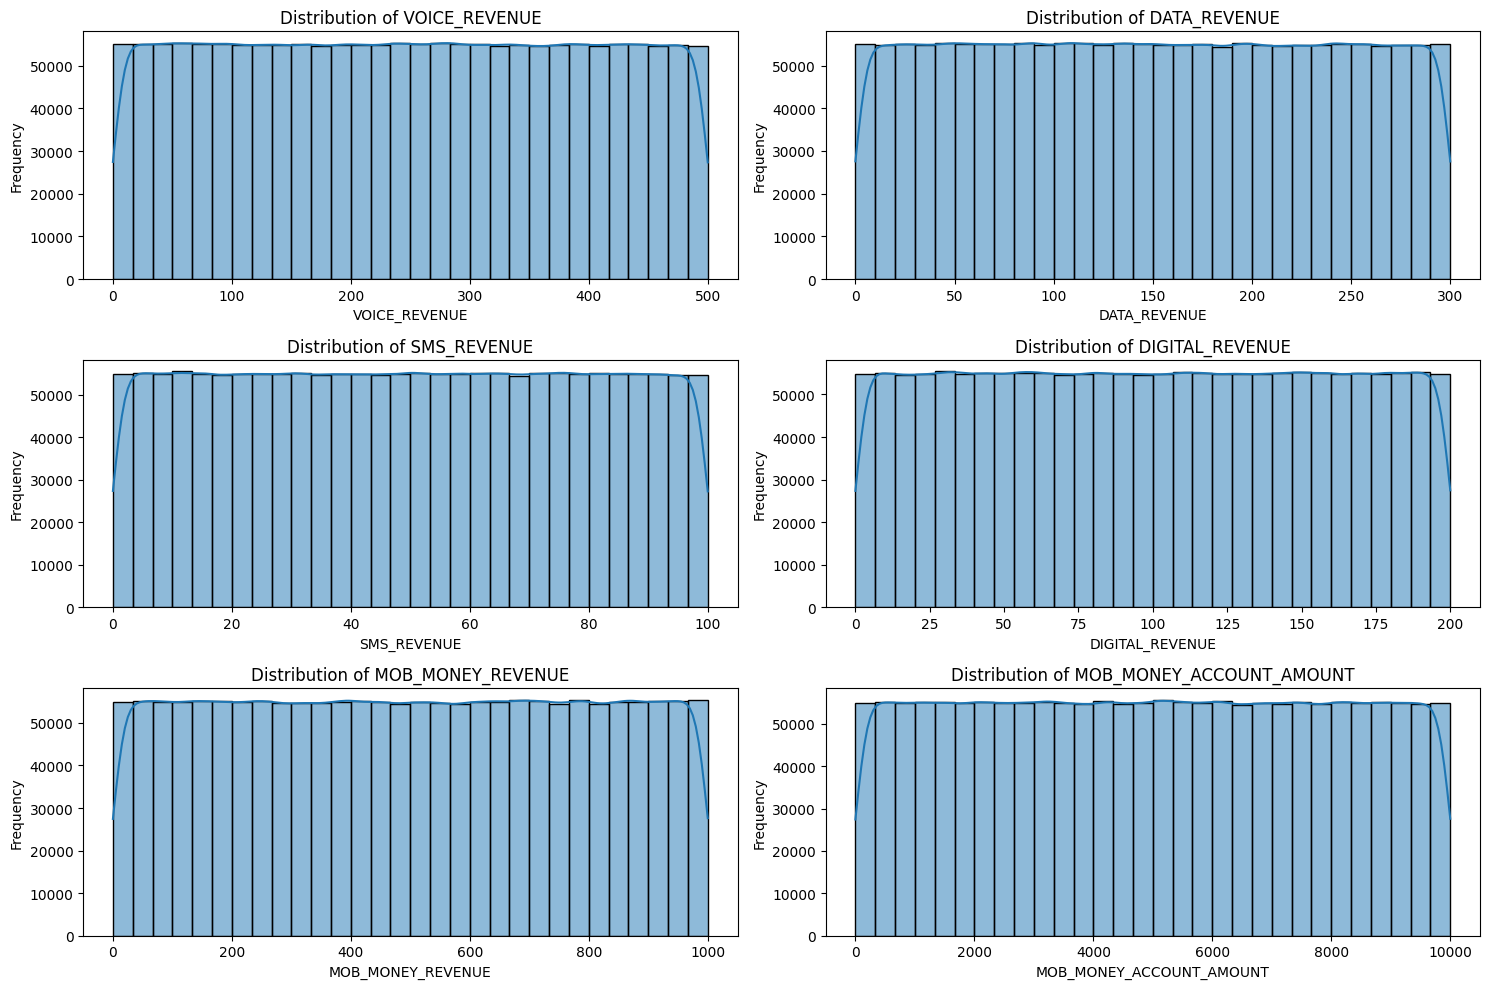

In [5]:
# Specify the columns to plot
columns_to_plot = [
    'VOICE_REVENUE',
    'DATA_REVENUE',
    'SMS_REVENUE',
    'DIGITAL_REVENUE',
    'MOB_MONEY_REVENUE',
    'MOB_MONEY_ACCOUNT_AMOUNT'
]

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Iterate over the columns and create a histogram for each
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1)  # Create a grid of 3 rows and 2 columns
    plot_column_distribution(merged_data, column)  # Call the function to plot each column

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

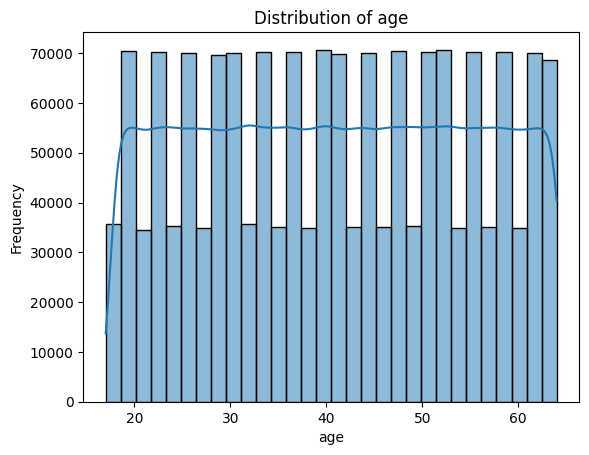

In [6]:
plot_column_distribution(merged_data, 'age')

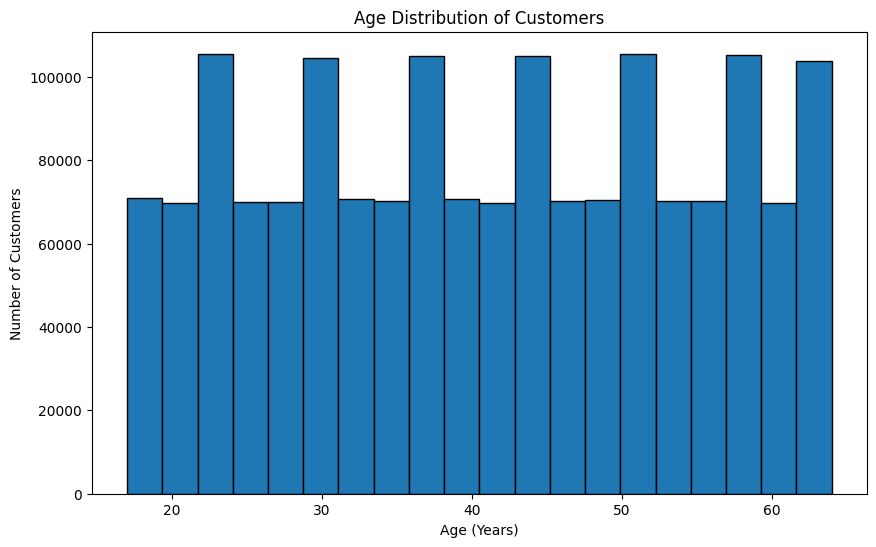

In [7]:
# Question: What is the age distribution of customers?

# Plot the age distribution of customers
plt.figure(figsize=(10, 6))
plt.hist(merged_data['age'], bins=20, edgecolor='black')
plt.title("Age Distribution of Customers")
plt.xlabel("Age (Years)")
plt.ylabel("Number of Customers")
plt.show()

In [8]:
merged_data[['age', 'MOB_MONEY_ACCOUNT_AMOUNT']].describe()

,age,MOB_MONEY_ACCOUNT_AMOUNT
count,1.648080e+06,1.648080e+06
mean,4.097306e+01,4.998686e+03
std,1.355357e+01,2.886544e+03
min,1.700000e+01,0.000000e+00
25%,2.900000e+01,2.499100e+03
50%,4.100000e+01,5.000140e+03
75%,5.300000e+01,7.498140e+03
max,6.400000e+01,1.000000e+04


/tmp/ipykernel_13878/811000446.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_bin', y='MOB_MONEY_ACCOUNT_AMOUNT', data=merged_data, estimator='mean', ci=None)


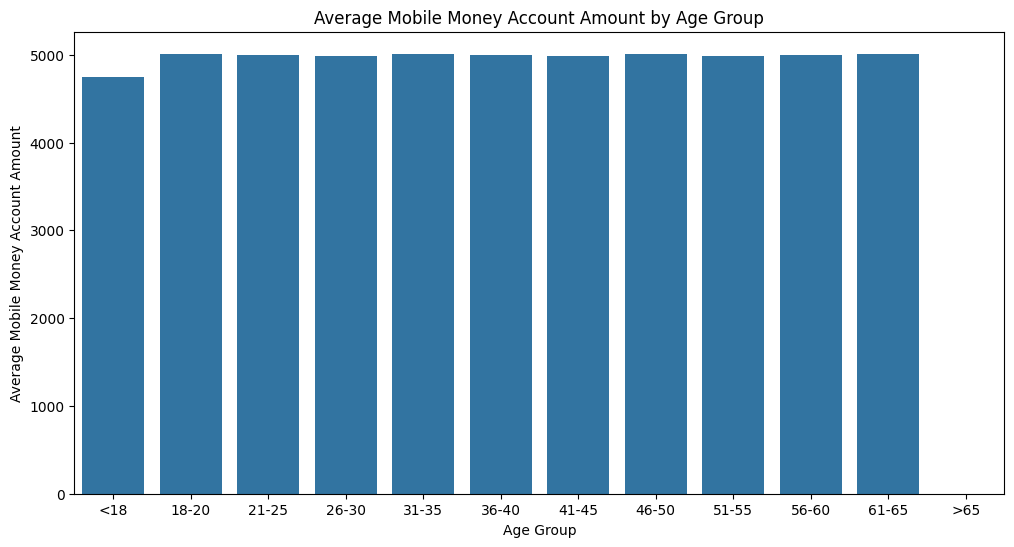

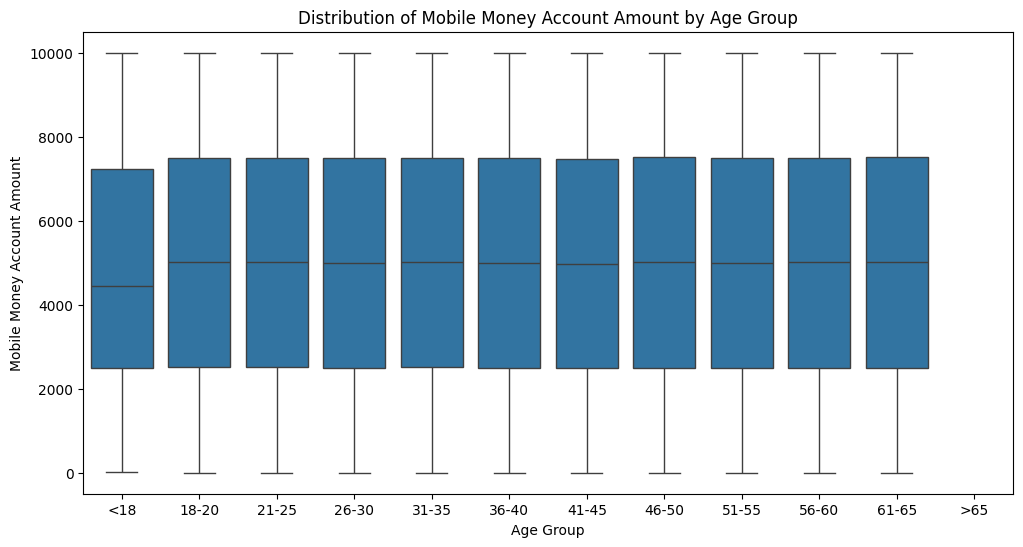

In [9]:
# Define the age bins and labels
age_bins = [0, 18, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 100]  # Adjust bins to fit the labels
age_labels = ['<18', '18-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '>65']

# Create a binned column in the dataframe
merged_data['age_bin'] = pd.cut(merged_data['age'], bins=age_bins, labels=age_labels, right=False)

# Plotting a bar plot to show average MOB_MONEY_ACCOUNT_AMOUNT by age bin
plt.figure(figsize=(12, 6))
sns.barplot(x='age_bin', y='MOB_MONEY_ACCOUNT_AMOUNT', data=merged_data, estimator='mean', ci=None)
plt.title('Average Mobile Money Account Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Mobile Money Account Amount')
plt.show()

# Optionally, a box plot to see the distribution within each age bin
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_bin', y='MOB_MONEY_ACCOUNT_AMOUNT', data=merged_data)
plt.title('Distribution of Mobile Money Account Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mobile Money Account Amount')
plt.show()

In [10]:
merged_data.drop(columns=['age_bin'], inplace=True)

In [11]:
merged_data.shape

(1648080, 103)

In [12]:
merged_data['HAS_USED_MOB_MONEY_IN_LAST_90_DAYS'].value_counts()

HAS_USED_MOB_MONEY_IN_LAST_90_DAYS
1    824648
0    823432
Name: count, dtype: int64